# 目的：通过数据集，分析每天check-ins的时间趋势

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 导入数据集

In [19]:
df = pd.read_csv("C:/Users/lx/Desktop/Low-MScThesis/BAReport - Dataset/foursquare-nyc-and-tokyo-check-ins/dataset_TSMC2014_TKY.csv")

# 统计分析

In [20]:
df1 = df

提取需要用到的列项【latitude,longitude,venueId,venueCategoryId,timezoneOffset】

In [21]:
df1.drop(["latitude","longitude","venueId","venueCategoryId","timezoneOffset"],axis=1)

,userId,venueCategory,utcTimestamp
0,1541,Cosmetics Shop,Tue Apr 03 18:17:18 +0000 2012
1,868,Ramen / Noodle House,Tue Apr 03 18:22:04 +0000 2012
2,114,Convenience Store,Tue Apr 03 19:12:07 +0000 2012
3,868,Food & Drink Shop,Tue Apr 03 19:12:13 +0000 2012
4,1458,Housing Development,Tue Apr 03 19:18:23 +0000 2012
...,...,...,...
573698,326,Music Venue,Sat Feb 16 02:34:35 +0000 2013
573699,853,Train Station,Sat Feb 16 02:34:53 +0000 2013
573700,1502,Tea Room,Sat Feb 16 02:34:55 +0000 2013
573701,408,Fast Food Restaurant,Sat Feb 16 02:35:17 +0000 2013


按【venueCategory】进行分类数据提取

In [22]:
df1_1 = df1.drop(index=(df1.loc[(df['venueCategory']!='Bar')].index))
df1_2 = df1.drop(index=(df1.loc[(df['venueCategory']!='Convenience Store')].index))
df1_3 = df1.drop(index=(df1.loc[(df['venueCategory']!='Food & Drink Shop')].index))
df1_4 = df1.drop(index=(df1.loc[(df['venueCategory']!='Japanese Restaurant')].index))
df1_5 = df1.drop(index=(df1.loc[(df['venueCategory']!='Ramen /  Noodle House')].index))
df1_6 = df1.drop(index=(df1.loc[(df['venueCategory']!='Subway')].index))

In [23]:
df1_1.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
179,925,4dc04611043706a0321210d4,4bf58dd8d48988d116941735,Bar,35.694846,139.704675,540,Tue Apr 03 22:35:34 +0000 2012
564,1541,4f50329ee4b07af68d5145d4,4bf58dd8d48988d121941735,Bar,35.708362,139.614100,540,Tue Apr 03 23:49:23 +0000 2012
770,1638,4c93701e1221b1f7defb19e2,4bf58dd8d48988d11f941735,Bar,35.672121,139.757367,540,Wed Apr 04 00:44:05 +0000 2012
1048,881,4f6227b2e4b073ddcaba153f,4bf58dd8d48988d116941735,Bar,35.701616,139.779713,540,Wed Apr 04 02:57:15 +0000 2012
1181,109,4e7f00bb2c5b077d1ae920aa,4bf58dd8d48988d116941735,Bar,35.685937,139.615818,540,Wed Apr 04 03:27:05 +0000 2012


In [24]:
df1_2.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
6,1541,4ea281c302d529c116a57755,4d954b0ea243a5684a65b473,Convenience Store,35.706277,139.617782,540,Tue Apr 03 19:21:00 +0000 2012
12,2290,4e538e91483b944199dede7a,4d954b0ea243a5684a65b473,Convenience Store,35.750751,139.582059,540,Tue Apr 03 20:08:42 +0000 2012
16,886,4b5a91e5f964a520cbcb28e3,4d954b0ea243a5684a65b473,Convenience Store,35.613889,139.724802,540,Tue Apr 03 20:19:58 +0000 2012
28,1240,4c21de7c9a67a593f285db87,4d954b0ea243a5684a65b473,Convenience Store,35.578777,139.734069,540,Tue Apr 03 20:55:16 +0000 2012


In [25]:
df1_3.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
66,1029,4dc24f03b0fb490416ac11b7,4bf58dd8d48988d1fa941735,Food & Drink Shop,35.755028,139.876985,540,Tue Apr 03 21:53:28 +0000 2012
84,1324,4ddb7a4ffa7637ab73db3f99,4bf58dd8d48988d118951735,Food & Drink Shop,35.578692,139.573649,540,Tue Apr 03 22:01:13 +0000 2012
90,1965,4b553487f964a5208fde27e3,4bf58dd8d48988d118951735,Food & Drink Shop,35.691278,139.711252,540,Tue Apr 03 22:05:31 +0000 2012
99,1726,4b98e261f964a520365435e3,4bf58dd8d48988d118951735,Food & Drink Shop,35.706055,139.648217,540,Tue Apr 03 22:09:29 +0000 2012


In [26]:
df1_4.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
131,1248,4b72c558f964a520d2872de3,4bf58dd8d48988d111941735,Japanese Restaurant,35.652506,139.544606,540,Tue Apr 03 22:23:00 +0000 2012
153,1320,4df7423e483b96f73159a256,4bf58dd8d48988d111941735,Japanese Restaurant,35.598386,139.666957,540,Tue Apr 03 22:29:18 +0000 2012
276,300,4bc8508214d79521afc768e9,4bf58dd8d48988d111941735,Japanese Restaurant,35.692448,139.771677,540,Tue Apr 03 22:56:08 +0000 2012
1050,342,4b95d003f964a52032b434e3,4bf58dd8d48988d111941735,Japanese Restaurant,35.729256,139.718681,540,Wed Apr 04 02:57:55 +0000 2012
1052,1801,4b7df9f5f964a5201add2fe3,4bf58dd8d48988d111941735,Japanese Restaurant,35.688439,139.763147,540,Wed Apr 04 02:58:16 +0000 2012


In [27]:
df1_5.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
9,2033,4b5c7671f964a520083129e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.693121,139.699447,540,Tue Apr 03 19:51:59 +0000 2012
13,471,4ba88a28f964a52028df39e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.709190,139.773822,540,Tue Apr 03 20:09:35 +0000 2012
233,29,4c0cdca798102d7fd838e106,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.752542,139.545780,540,Tue Apr 03 22:46:48 +0000 2012
421,1338,4d1a7b6f02a66dcb3d806065,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.550367,139.788622,540,Tue Apr 03 23:28:05 +0000 2012


In [28]:
df1_6.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
32,1876,4b5da9e0f964a520bb6529e3,4bf58dd8d48988d1fd931735,Subway,35.748805,139.719599,540,Tue Apr 03 20:59:52 +0000 2012
34,499,4b8c5418f964a520e3ca32e3,4bf58dd8d48988d1fd931735,Subway,35.682207,139.798767,540,Tue Apr 03 21:04:04 +0000 2012
54,2085,4b5bac4af964a520200f29e3,4bf58dd8d48988d1fd931735,Subway,35.550029,139.633677,540,Tue Apr 03 21:39:12 +0000 2012
65,1143,4b7481e1f964a520bde02de3,4bf58dd8d48988d1fd931735,Subway,35.730273,139.711378,540,Tue Apr 03 21:52:17 +0000 2012
75,1965,4b2692f9f964a520be7d24e3,4bf58dd8d48988d1fd931735,Subway,35.688597,139.710691,540,Tue Apr 03 21:56:43 +0000 2012


将数据中需要用到的时间信息在时间戳中截断

In [29]:
df2_1 = df1_1['utcTimestamp'].str[0:3]
df2_2 = df1_2['utcTimestamp'].str[0:3]
df2_3 = df1_3['utcTimestamp'].str[0:3]
df2_4 = df1_4['utcTimestamp'].str[0:3]
df2_5 = df1_5['utcTimestamp'].str[0:3]
df2_6 = df1_6['utcTimestamp'].str[0:3]

对每个数据集进行排序

In [30]:
df3_1 = df2_1.value_counts(sort=False)
df3_2 = df2_2.value_counts(sort=False)
df3_3 = df2_3.value_counts(sort=False)
df3_4 = df2_4.value_counts(sort=False)
df3_5 = df2_5.value_counts(sort=False)
df3_6 = df2_6.value_counts(sort=False)

In [31]:
print(df2_1.value_counts(sort=False))
print(df2_2.value_counts(sort=False))
print(df2_3.value_counts(sort=False))
print(df2_4.value_counts(sort=False))
print(df2_5.value_counts(sort=False))
print(df2_6.value_counts(sort=False))

Tue    1626
Wed    1783
Thu    1783
Fri    2816
Sat    2885
Sun    2210
Mon    1837
Name: utcTimestamp, dtype: int64
Tue    2645
Wed    2348
Thu    2481
Fri    2147
Sat    2067
Sun    2339
Mon    2806
Name: utcTimestamp, dtype: int64
Tue    1755
Wed    1679
Thu    1689
Fri    1587
Sat    2286
Sun    2852
Mon    2175
Name: utcTimestamp, dtype: int64
Tue    2210
Wed    2198
Thu    2224
Fri    2406
Sat    2367
Sun    2048
Mon    2227
Name: utcTimestamp, dtype: int64
Tue    2461
Wed    2324
Thu    2500
Fri    2658
Sat    2518
Sun    2291
Mon    2551
Name: utcTimestamp, dtype: int64
Tue    6630
Wed    6383
Thu    6349
Fri    5798
Sat    4792
Sun    5082
Mon    6632
Name: utcTimestamp, dtype: int64


In [32]:
def change_dict(df1,df2):
    df1.append(df2['Mon'])
    df1.append(df2['Tue'])
    df1.append(df2['Wed'])
    df1.append(df2['Thu'])
    df1.append(df2['Fri'])
    df1.append(df2['Sat'])
    df1.append(df2['Sun'])
    return df1

把数据集分别放入字典中

In [33]:
df4_1 = []
df4_2 = []
df4_3 = []
df4_4 = []
df4_5 = []
df4_6 = []
df4_1 = change_dict(df4_1,df3_1)
df4_2 = change_dict(df4_2,df3_2)
df4_3 = change_dict(df4_3,df3_3)
df4_4 = change_dict(df4_4,df3_4)
df4_5 = change_dict(df4_5,df3_5)
df4_6 = change_dict(df4_6,df3_6)

# 作出图表

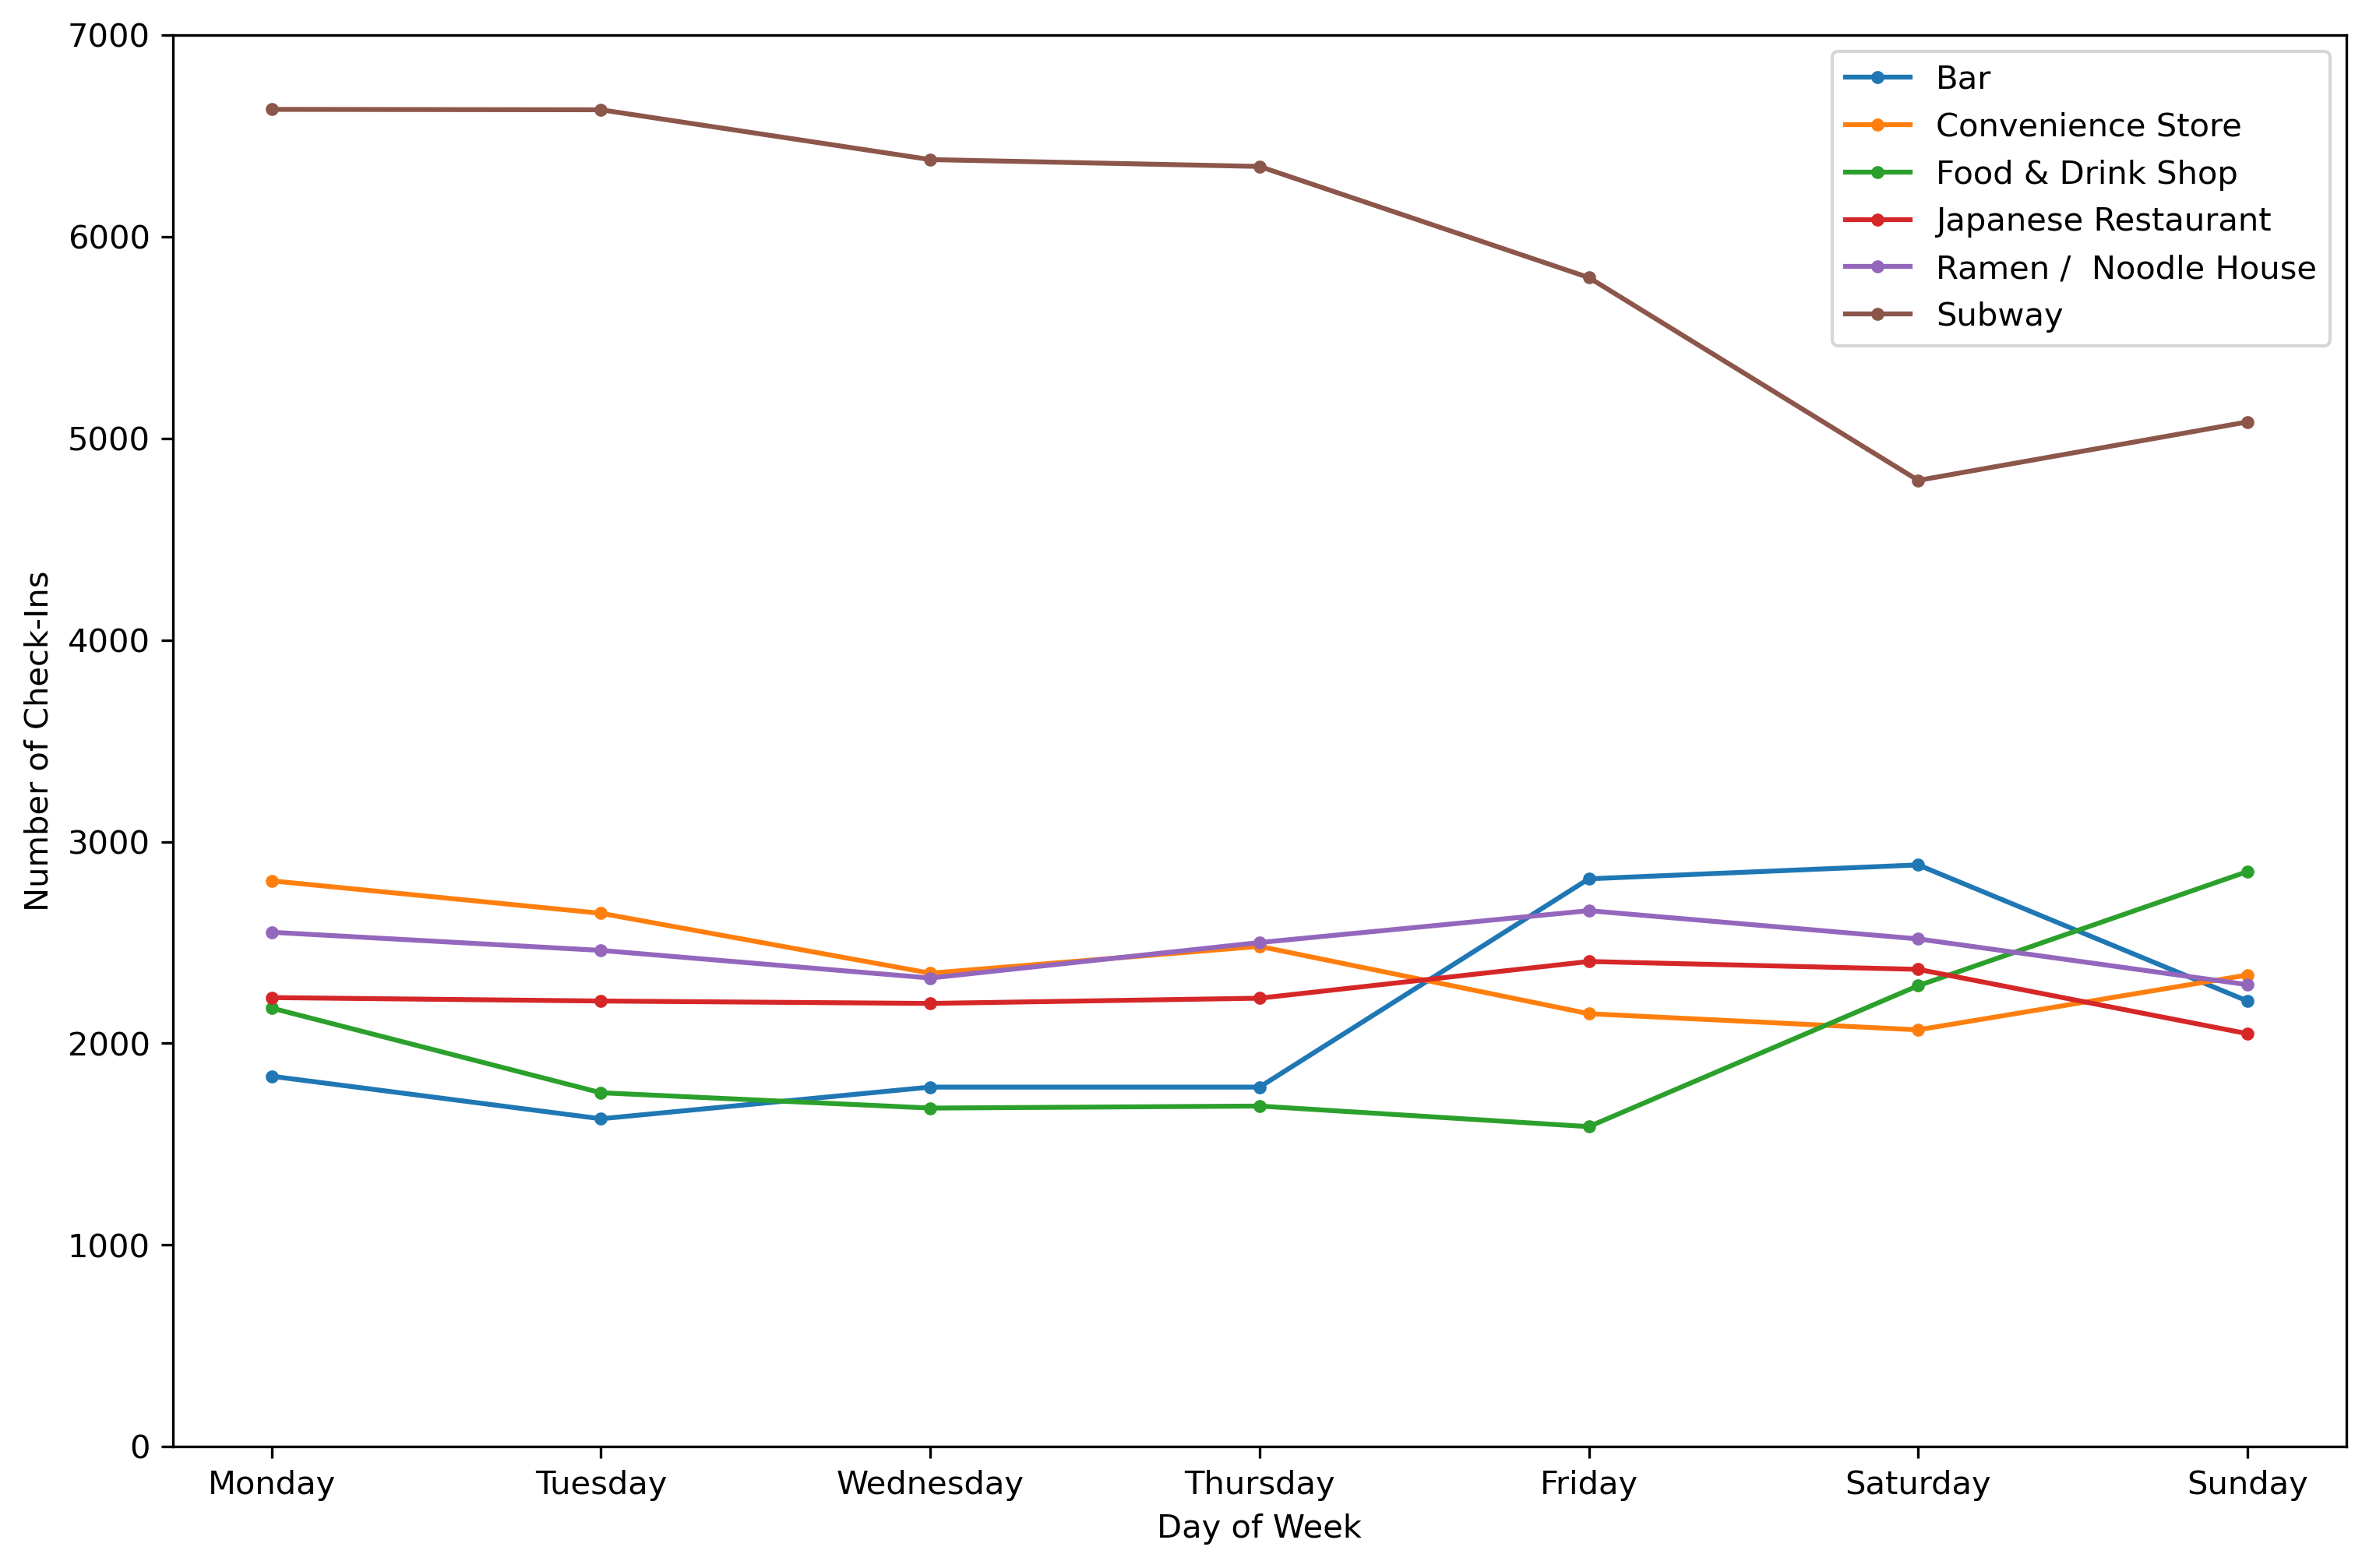

In [35]:
x = [0,1,2,3,4,5,6]
plt.plot(x,df4_1,label='Bar',marker='.')
plt.plot(x,df4_2,label='Convenience Store',marker='.')
plt.plot(x,df4_3,label='Food & Drink Shop',marker='.')
plt.plot(x,df4_4,label='Japanese Restaurant',marker='.')
plt.plot(x,df4_5,label='Ramen /  Noodle House',marker='.')
plt.plot(x,df4_6,label='Subway',marker='.')
y1 = range(0,8000,1000)
x1 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
x2 = range(7)
plt.xticks(x2,x1)
plt.yticks(y1)
plt.xlabel('Day of Week')
plt.ylabel('Number of Check-Ins')
plt.legend(loc='upper right')
plt.rcParams['figure.figsize']=(12.0,8.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.show()

# 结果分析：从图中可以看出，地铁在工作日保持着很高的签入量但在周末下降20%-30%。同时，在周五和周末，签入酒吧的人数显著增加。